# **Fashion MNIST Classification**

Seeding for reproducibility

In [1]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

Importing the dependencies

In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


Data creation

In [3]:
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 10s 2us/step


Data Processing

In [4]:
# Checking the datatype
type(train_images)

numpy.ndarray

In [5]:
# Printing the first data
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [6]:
# Checking the total number of data
print(train_images.shape)

(60000, 28, 28)


So we are having 60,000 images of 28 X 28 size

In [7]:
type(train_labels)

numpy.ndarray

In [8]:
print(len(train_images))

60000


In [9]:
print(len(train_labels))

60000


In [10]:
print(train_labels.shape)

(60000,)


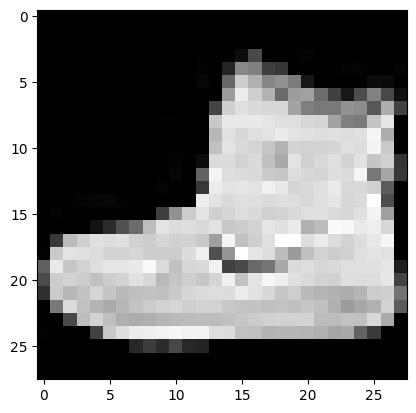

In [11]:
# Displaying the first image
plt.imshow(train_images[0],cmap='gray')
plt.show()

In [12]:
print(train_images[0].shape)

(28, 28)


In [13]:
print(train_labels[0])

9


In [14]:
# Normalize pixel values to be between 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [15]:
# Reshape images to specify that its a single channel (grayscale)
train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_images = test_images.reshape(test_images.shape[0],28,28,1)

**Convolutional Neural Network**

In [16]:
# Building the Convolutional Base
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

# Add Dense Layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [17]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
# Training the model
histroy = model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5


D:\Deep Learning Projects\Project_6_Fashion_MNIST_CNN_Classifier\.venv\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 37s 8ms/step - loss: 0.4928 - accuracy: 0.8200 - val_loss: 0.3623 - val_accuracy: 0.8701
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3196 - accuracy: 0.8825 - val_loss: 0.3166 - val_accuracy: 0.8864
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2707 - accuracy: 0.9000 - val_loss: 0.2957 - val_accuracy: 0.8937
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2395 - accuracy: 0.9112 - val_loss: 0.2766 - val_accuracy: 0.8996
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2168 - accuracy: 0.9196 - val_loss: 0.2803 - val_accuracy: 0.9008


**Model Evaluation**

In [19]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.2803 - accuracy: 0.9008 - 1s/epoch - 4ms/step
0.9007999897003174


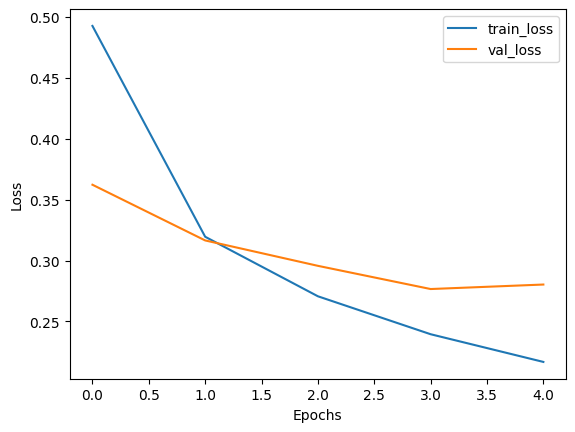

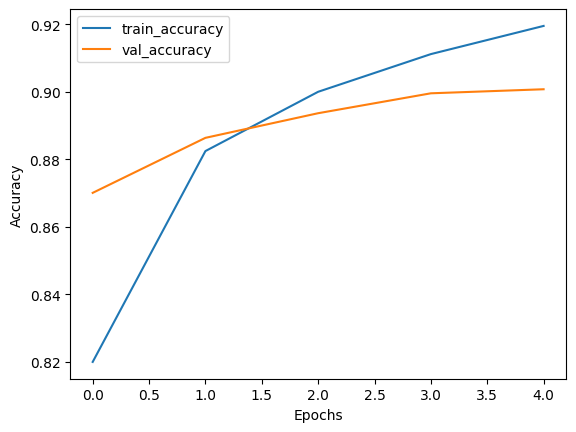

In [20]:
# Plotting the loss graph
plt.plot(histroy.history['loss'],label='train_loss')
plt.plot(histroy.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the Accuracy Graph
plt.plot(histroy.history['accuracy'],label='train_accuracy')
plt.plot(histroy.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
# Saving the model
model.save("fashion_mnist_model.h5")